(3040, 4056, 3)
760
HeatSignature: 2021


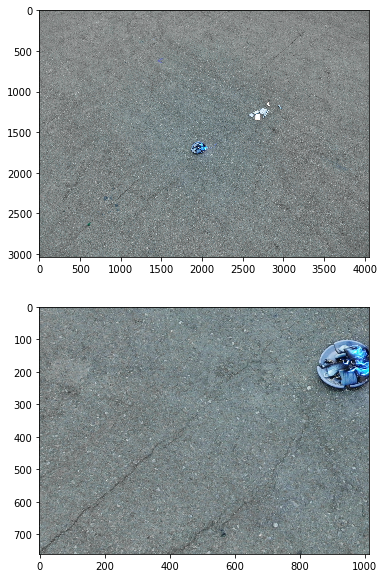

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

imges = cv2.imread('feuer.jpg')
print(imges.shape)

n , m , z = imges.shape
div = 4

px = int(m/div)
py = int(n/div)

print(py)

im = []
sub_image=1
for k in range(1,5):
    for i in range(1,5):
        im.append([imges[(py*(k-1)):(py*k),(px*(i-1)):(px*i)], sub_image])
        sub_image+=1
        
        

for picnr in range (div**2):
    
    ## Read
    img = im[picnr][0]

    ## convert to hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    ## mask of green (36,0,0) ~ (70, 255,255)
    mask = cv2.inRange(hsv, (0, 170, 0), (70, 255,255))

    ## mask o yellow (15,0,0) ~ (36, 255, 255)

    target = cv2.bitwise_and(img,img, mask=mask)

    cv2.imwrite("target.png", target)

    target = Image.open('target.png')

    count = 0

    width, height = target.size
    for x in range(width):
            for y in range(height):
                r,g,b = target.getpixel((x,y))
                if r >160:
                    R,G,B = 255,255,255
                    count +=1
                
                else:
                    R,G,B = 0,0,0
                target.putpixel((x,y),(R,G,B))
                
    
    if count > 1000:
        print(f'HeatSignature: {count}')
        plt.figure(figsize=(10,10))
        
        plt.subplot(211)
        plt.imshow(imges)
        plt.subplot(212)
        plt.imshow(im[picnr][0])
        Fire = True